In [2]:
# Dependencies
import pandas as pd
import numpy as np
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

#matplotlib
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [5]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1fe5cae9ac0>,
 'prcp': 0.08,
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397',
 'date': '2010-01-01'}

## D1: Determine the Summary Statistics for June

In [6]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

results_june = []
results_june = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()
print(results_june)


[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [7]:
#  3. Convert the June temperatures to a list.
#results_june = list(np.ravel(results_june))
results_june = list((results_june))
results_june

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [8]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df_results_june = pd.DataFrame(results_june, columns = ['date', 'June Temps'])
df_results_june

,date,June Temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [9]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df_results_june.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [10]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_dec = []
results_dec = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()
print(results_dec)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [11]:
# 7. Convert the December temperatures to a list.
results_dec = list((results_dec))
results_dec

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [12]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_results_dec = pd.DataFrame(results_dec, columns = ['date', 'December Temps'])
df_results_dec

,date,December Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [13]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_results_dec.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3: 2 queries to gather more weather data for June and December

### Query 1: Precipitation for June and December with Plots

Text(0.5, 1.0, 'June Precipitation')

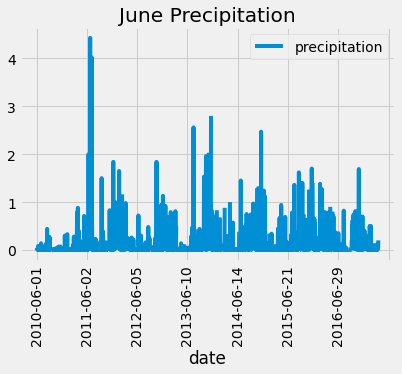

In [14]:
june_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()

df_june_prcp = pd.DataFrame(june_prcp, columns = ['date', 'precipitation'])

df_june_prcp.set_index(df_june_prcp['date'], inplace = True)

df_june_prcp = df_june_prcp.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df_june_prcp.plot()
plt.xticks(rotation = 90)
plt.title("June Precipitation")

Text(0.5, 1.0, 'December Precipitation')

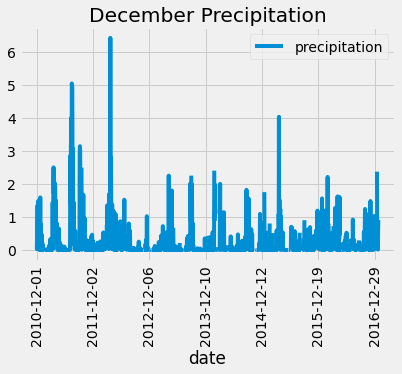

In [15]:
dec_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()

df_dec_prcp = pd.DataFrame(dec_prcp, columns = ['date', 'precipitation'])

df_dec_prcp.set_index(df_dec_prcp['date'], inplace = True)

df_dec_prcp = df_dec_prcp.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
df_dec_prcp.plot()
plt.xticks(rotation = 90)
plt.title("December Precipitation")

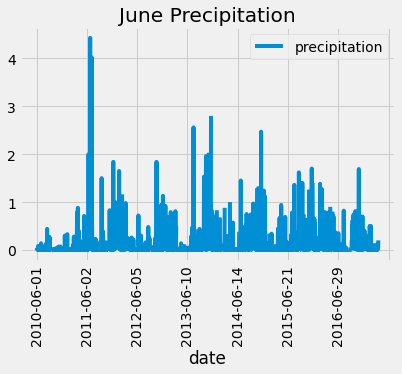

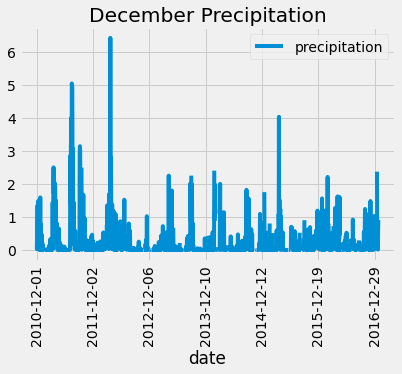

In [26]:
#figure, axes = plt.subplots(1, 2)

#df_june_prcp.plot(ax=axes[0])
df_june_prcp.plot()
plt.xticks(rotation = 90)
plt.title("June Precipitation")

#df_dec_prcp.plot(ax=axes[1])
df_dec_prcp.plot()
plt.xticks(rotation = 90)
plt.title("December Precipitation")

plt.show()


In [59]:
# Join the temperatures summaries
june_temp_summary = df_results_june.describe()
dec_temp_summary = df_results_dec.describe()
merged_temp_summary = pd.merge(june_temp_summary, dec_temp_summary, left_index=True,right_index=True) #use index to merge
merged_temp_summary

,June Temps,December Temps
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


In [67]:
june_prcp_summary = df_june_prcp.describe()
dec_prcp_summary = df_dec_prcp.describe()
merged_prcp_summary = pd.merge(june_prcp_summary, dec_prcp_summary,
                               left_index=True,right_index=True, 
                               suffixes=('_June', '_Dec')) #use index to merge
merged_prcp_summary

,precipitation_June,precipitation_Dec
count,1574.000000,1405.000000
mean,0.136360,0.216819
std,0.335731,0.541399
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.020000,0.030000
75%,0.120000,0.150000
max,4.430000,6.420000


### Query 2: Temperature by Station for June and December

In [40]:
june_stations_temp = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                        group_by(Measurement.station).\
                        filter(extract('month', Measurement.date) == 6).all()

In [48]:
df_june_stations_temp = pd.DataFrame(june_stations_temp, columns = ['Stations', 'Min', 'Max', 'Avg'])
df_june_stations_temp.set_index(df_june_stations_temp['Stations'], inplace = True)
df_june_stations_temp.drop('Stations', inplace=True, axis=1)
df_june_stations_temp

,Min,Max,Avg
Stations,,,
USC00511918,66.0,85.0,74.139394
USC00513117,68.0,83.0,74.050847
USC00514830,67.0,81.0,76.005376
USC00516128,66.0,79.0,71.937220
USC00517948,64.0,82.0,76.655405
USC00518838,67.0,78.0,73.394737
USC00519281,65.0,82.0,73.271186
USC00519397,70.0,84.0,77.559322
USC00519523,71.0,82.0,76.668103


In [49]:
dec_stations_temp = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                        group_by(Measurement.station).\
                        filter(extract('month', Measurement.date) == 12).all()

In [50]:
df_dec_stations_temp = pd.DataFrame(dec_stations_temp, columns = ['Stations', 'Min', 'Max', 'Avg'])
df_dec_stations_temp.set_index(df_dec_stations_temp['Stations'], inplace = True)
df_dec_stations_temp.drop('Stations', inplace=True, axis=1)
df_dec_stations_temp

,Min,Max,Avg
Stations,,,
USC00511918,57.0,81.0,69.684211
USC00513117,63.0,80.0,71.069444
USC00514830,62.0,79.0,73.224719
USC00516128,60.0,83.0,69.291262
USC00517948,64.0,82.0,71.834862
USC00518838,63.0,78.0,72.421053
USC00519281,58.0,79.0,69.903226
USC00519397,56.0,77.0,71.109524
USC00519523,56.0,79.0,72.433333


In [66]:
#stations_merged = pd.merge(df_june_stations_temp, df_dec_stations_temp, how = 'outer', on = 'Stations', suffixes=('_June', '_Dec'))
stations_merged = pd.merge(df_june_stations_temp, df_dec_stations_temp,
                           left_index=True,right_index=True,
                           suffixes=('_June', '_Dec'))
stations_merged

,Min_June,Max_June,Avg_June,Min_Dec,Max_Dec,Avg_Dec
Stations,,,,,,
USC00511918,66.0,85.0,74.139394,57.0,81.0,69.684211
USC00513117,68.0,83.0,74.050847,63.0,80.0,71.069444
USC00514830,67.0,81.0,76.005376,62.0,79.0,73.224719
USC00516128,66.0,79.0,71.937220,60.0,83.0,69.291262
USC00517948,64.0,82.0,76.655405,64.0,82.0,71.834862
USC00518838,67.0,78.0,73.394737,63.0,78.0,72.421053
USC00519281,65.0,82.0,73.271186,58.0,79.0,69.903226
USC00519397,70.0,84.0,77.559322,56.0,77.0,71.109524
USC00519523,71.0,82.0,76.668103,56.0,79.0,72.433333
